In [20]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [21]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2,1,(3,1), activation=['linear', 'linear'])

In [22]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx=',wx,'wh=',wh,'bh=',bh,'wy=',wy,'by=',by)

wx= [[0.9609195 1.3443867]] wh= [[-0.6549201   0.75569814]
 [ 0.75569814  0.6549201 ]] bh= [0. 0.] wy= [[-0.84001666]
 [-0.37020814]] by= [0.]


In [23]:
x = np.array([1,2,3])
x_input = np.reshape(x,(1,3,1))
y_pred_model = demo_model.predict(x_input)

m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0],wx) + h0 + bh
h2 = np.dot(x[1],wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2],wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3,wy) + by

print('h1 = ',h1,'h2 = ',h2,'h3 = ',h3)
print('prediction from network ',y_pred_model)
print('prediction from ouer computation ', o3)

h1 =  [[0.9609195 1.3443867]] h2 =  [[2.30846404 4.29540435]] h3 =  [[4.61692809 8.59080873]]
prediction from network  [[-7.0586843]]
prediction from ouer computation  [[-7.05868389]]


In [24]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1],engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data,test_data,data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data,test_data, data = get_train_test(sunspots_url)

In [25]:
def get_xy(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat),time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x,time_steps , 1))
    return X,Y
time_steps = 12
trainX, trainY = get_xy(train_data, time_steps)
teatX, testY = get_xy(test_data, time_steps)

In [26]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),activation=['tanh','tanh'])
model.fit(trainX,trainY, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
187/187 [==============================] - 2s 11ms/step - loss: 0.0248
Epoch 2/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0155
Epoch 3/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0116
Epoch 4/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 5/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 6/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0073 ETA: 
Epoch 7/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0066
Epoch 8/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0061A
Epoch 9/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0060
Epoch 10/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0053
Epoch 11/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 12/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0049
Epoch 13/20
187/1

In [27]:
def print_error(trainY, testY, train_predict, test_predict):
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY , test_predict))
    
    print('Train RMSE: %.3f RMSE'%(train_rmse))
    print('Test RMSE: %.3f RMSE'%(test_rmse))
    
train_predict = model.predict(trainX)
test_predict = model.predict(teatX)
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.067 RMSE
Test RMSE: 0.094 RMSE


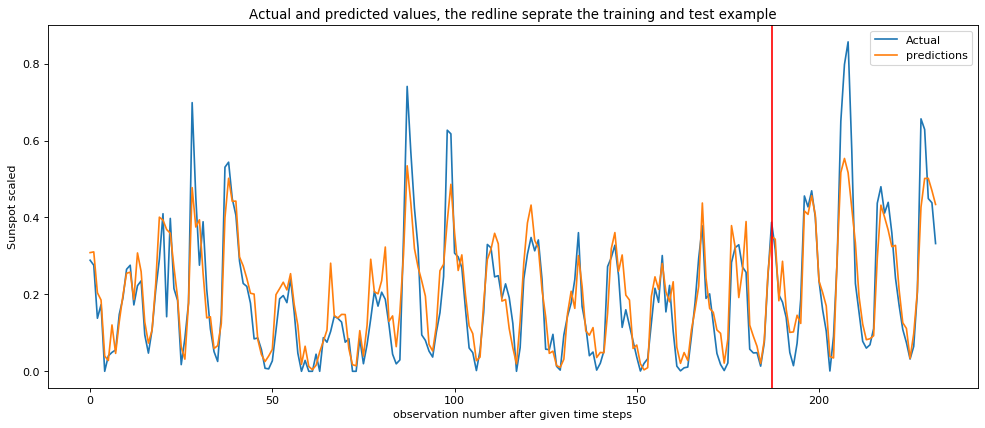

In [28]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY,testY)
    prediction = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows),prediction)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual','predictions'])
    plt.xlabel('observation number after given time steps')
    plt.ylabel('Sunspot scaled')
    plt.title('Actual and predicted values, the redline seprate the training and test example')

plot_result(tarainY, testY, train_predict, test_predict)